## Summary

In [1]:
from utility import *
import pandas as pd

Models were evaluated and tuned based on logistic regression, random forests, and neural networks.
As the data set is highly biased towards unstable binary compounds, the dataset was rebalanced to aid in training. As all stability vectors have 1 at the 0 and 10 index, modelling and evaluation solely focussed on the 1-9 indices.

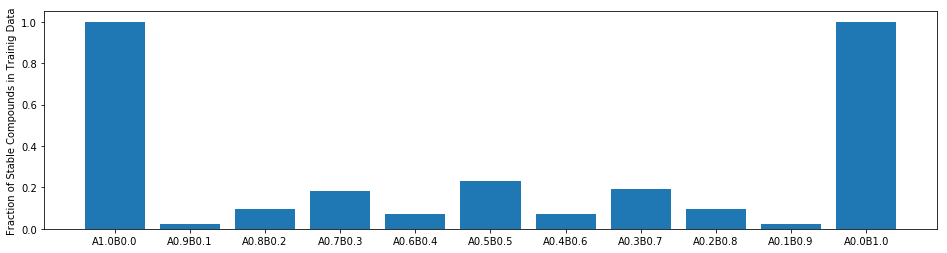

In [22]:
ytrain = pLoad("ytrain")
plt.figure(figsize=(16,4))
plt.bar(np.arange(ytrain.shape[1]),np.mean(ytrain, axis = 0))

plt.ylabel('Fraction of Stable Compounds in Trainig Data')
plt.xticks(np.arange(ytrain.shape[1]), ["A" + str(np.round(1-i/10, decimals = 1)) + "B" + str(i/10) for i in range(11) ])
plt.show()

One issue is that fitting a trivial model that outputs [0,0,0,0,0,0,0,0,0] may and was shown to occur in the case of the logistic regression and nueral network due to unbalanced classes.

To resolve this issue, new training subsets were generated on a per stability vector index basis that are balanced for stable and unstable observations.

Notebooks are included that summarize the key steps used in:
* data prepreocessing and vizulatization
* developing a logistic regression
* developing a random forest classifier
*developing a neural network classifier. 

Additional files of code are included:
* featureGen.py for augmenting features
* utility.py for data handling and cross validation
* rebalance.py for balancing classes and logistic regression on the resulting training data


## Summary of model fitting results

In [42]:
rf  = pd.DataFrame(pLoad("randomforest"))
log = pd.DataFrame(pLoad("logreg"))
nn = pd.DataFrame(pLoad("neuralnetwork"))
pd.concat([pd.Series(["train MSE","test MSE","train precision","train recall"]), log,rf, nn],axis = 1)

,0,logistic,random forest,neural network
0,train MSE,0.268881,0.039449,0.176742
1,test MSE,0.267574,0.076666,0.178153
2,train precision,0.821862,0.449393,0.826923
3,train recall,0.260758,0.727869,0.238540


The random forest had the lowest test and training MSE. The high traing MSE of the logistic regression indiciates that the stability does not follow a simple relation in the predictors. Although neural network can have very high flexibility, they can require comparatively large training data sets. The random forest is much more flexible than the logistic regression but is less dependent on having a large training dataset which may explain the comparatively high performance of the random forest classifier. The neural network and logistic regression have the highest precissions while the random forest has the highest recall.

Although the neural net offers very high flexibility, its accuracy was limited even on the train set. The neural network was able to train on the A.07B0.3, A0.5B0.5, and A0.3B.07 while there was great difficulty training for the other binary compositions. This mostly likely resulted from the small training data size due to a lack of observation of stable compounds for these other alloys. Augmenting the training data set and/or training the neural network or transfer learning from another chemical data set may allow for training more complex neural networks and improve the performance to exceed the random forest.